In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from scipy import stats
!pip from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

!pip from pycaret  import regression
from sklearn.model_selection import cross_val_score

ERROR: unknown command "from"
ERROR: unknown command "from"
ERROR: unknown command "from"


In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.shape

(200, 4)

In [ ]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]
target = "Sales"
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]
target = "Sales"
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Error:  14.1
Baseline Error:  [14.1, 14.1, 14.1, 14.1, 14.1]
MAE Baseline:  4.12


In [ ]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [ ]:
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [ 9.68827502 12.67337707 10.0553326   8.20010235 13.49562077]
MAE for training data after prediction:  1.1984678961500137


In [ ]:
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]
MAE for test data after prediction:  1.4607567168117603


In [ ]:
intercept = model.intercept_
intercept

2.979067338122629

In [ ]:
coefficient = model.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

In [ ]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 2.979067338122629 + 0.044729517468716326 * TV + 0.18919505423437652 * Radio + 0.0027611143413671935 * Newspaper


In [ ]:
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.8957008271017818
Score of test data:  0.8957008271017818


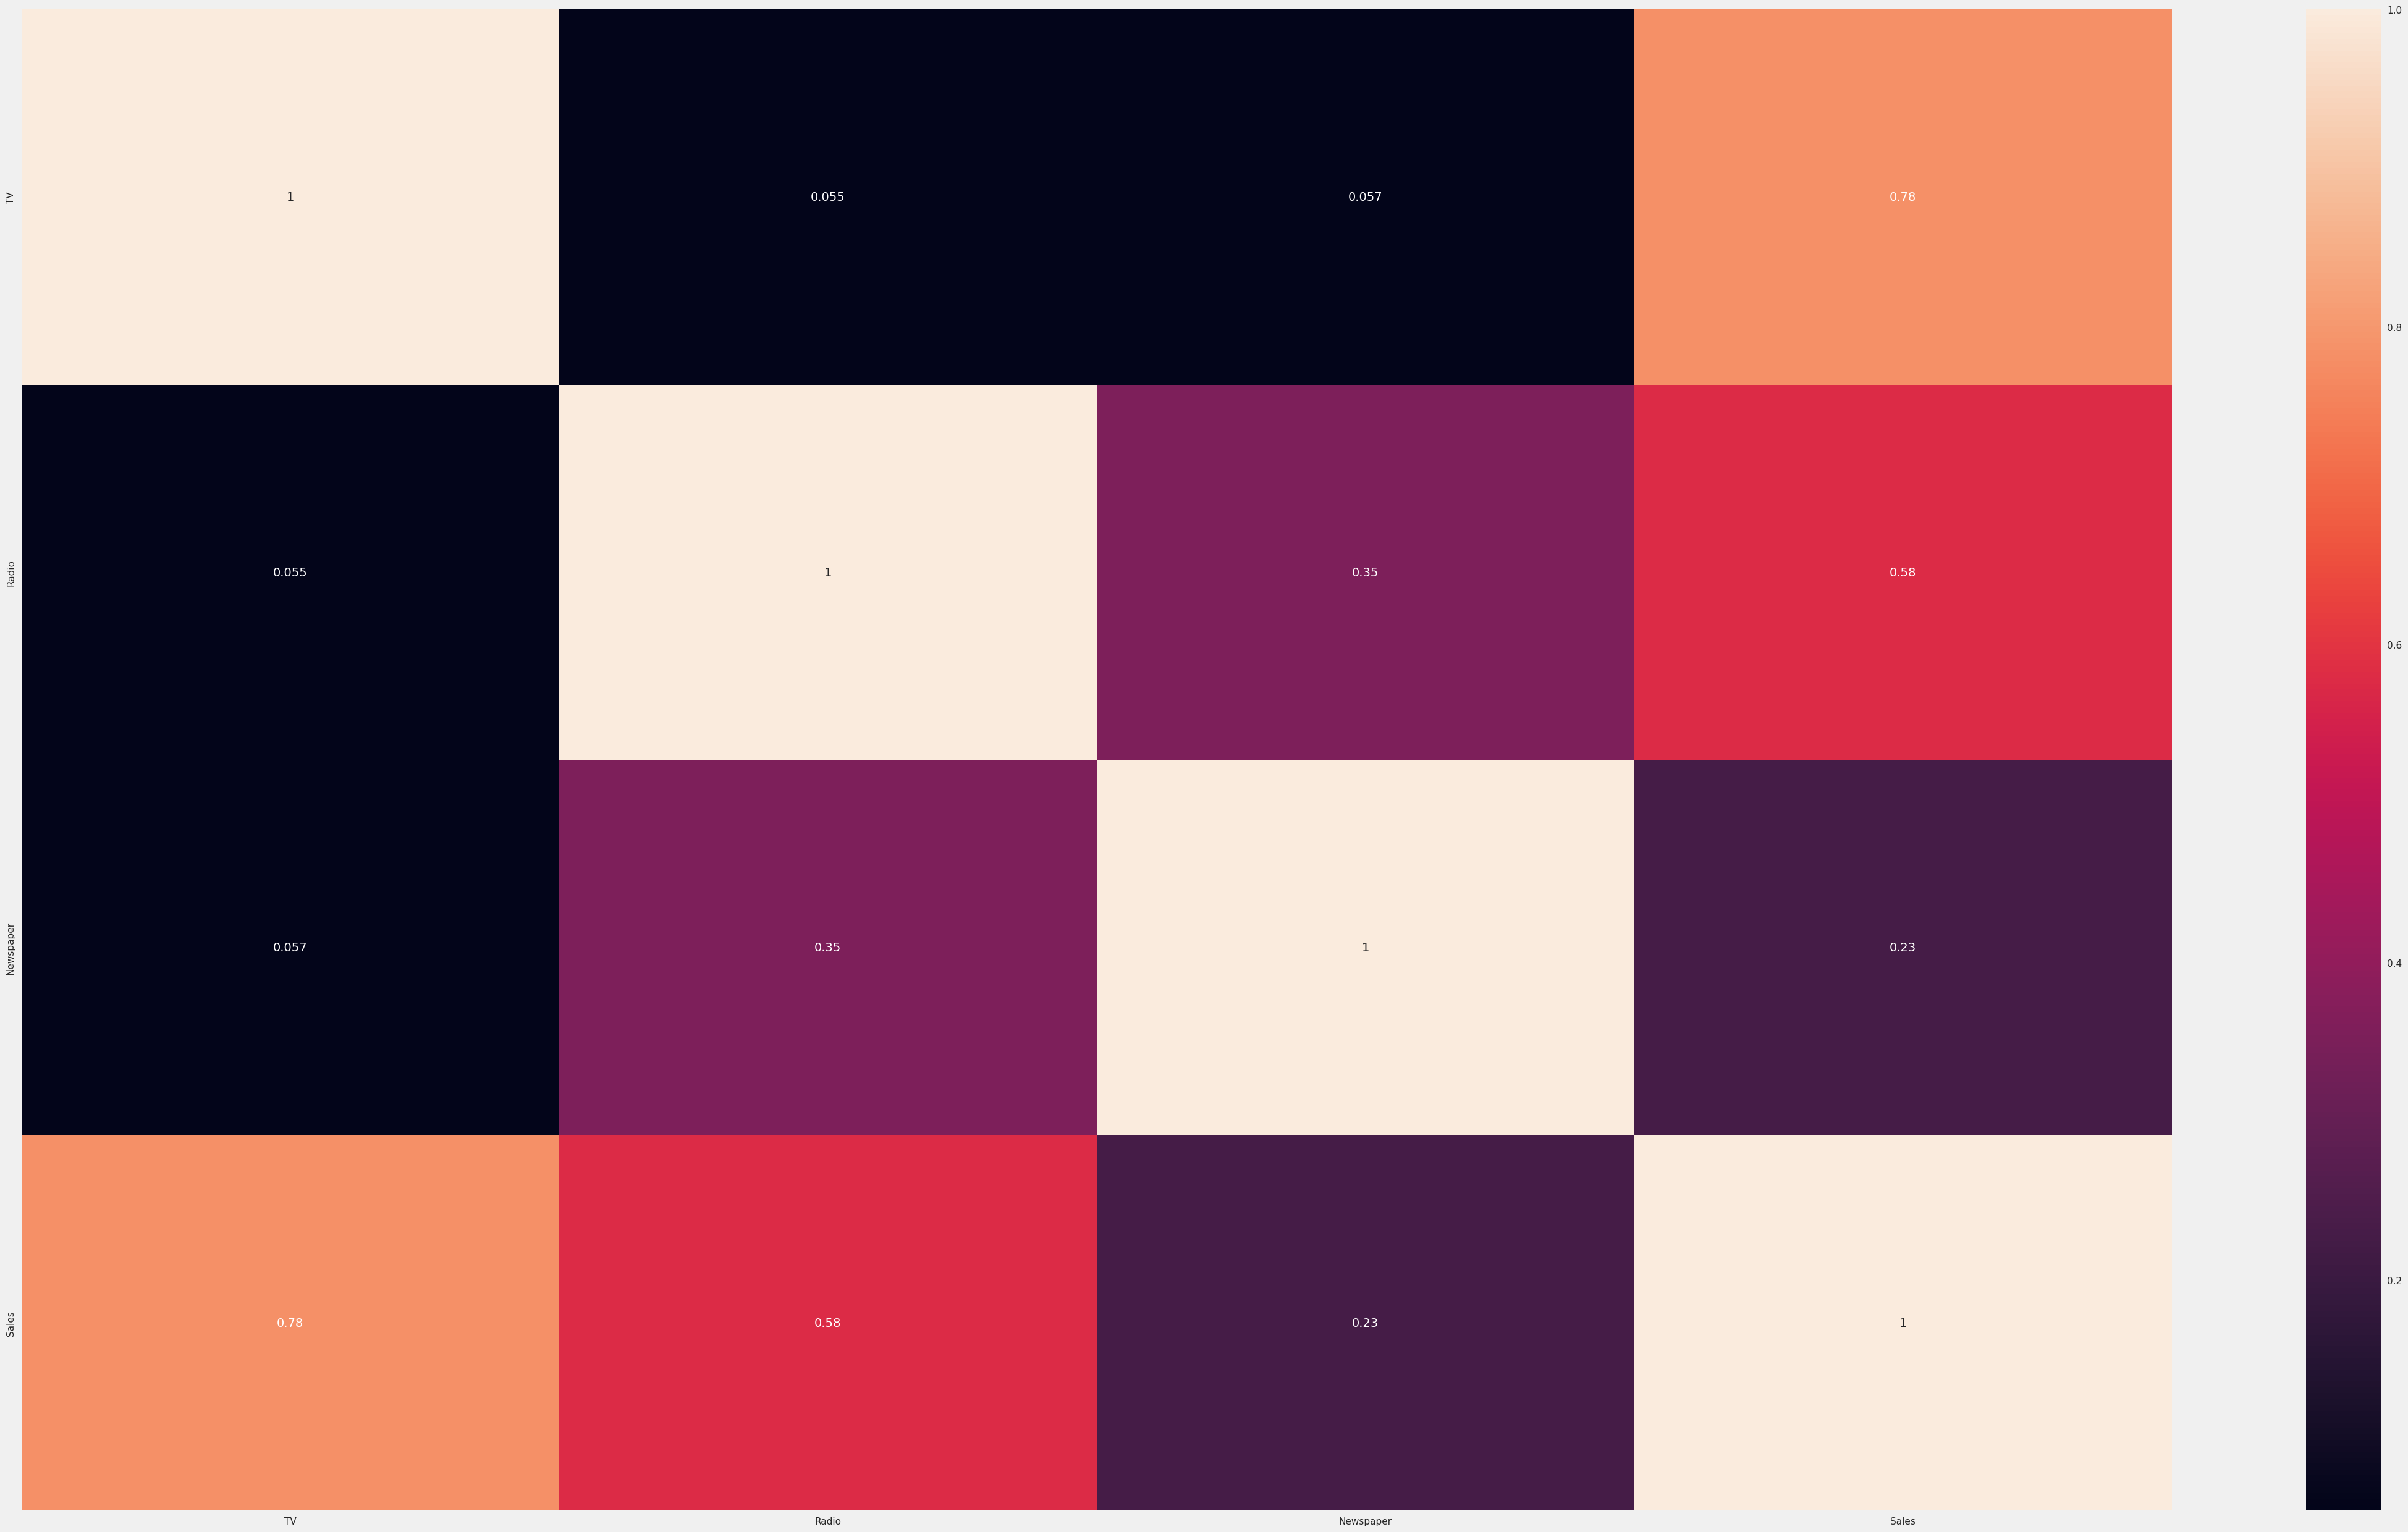

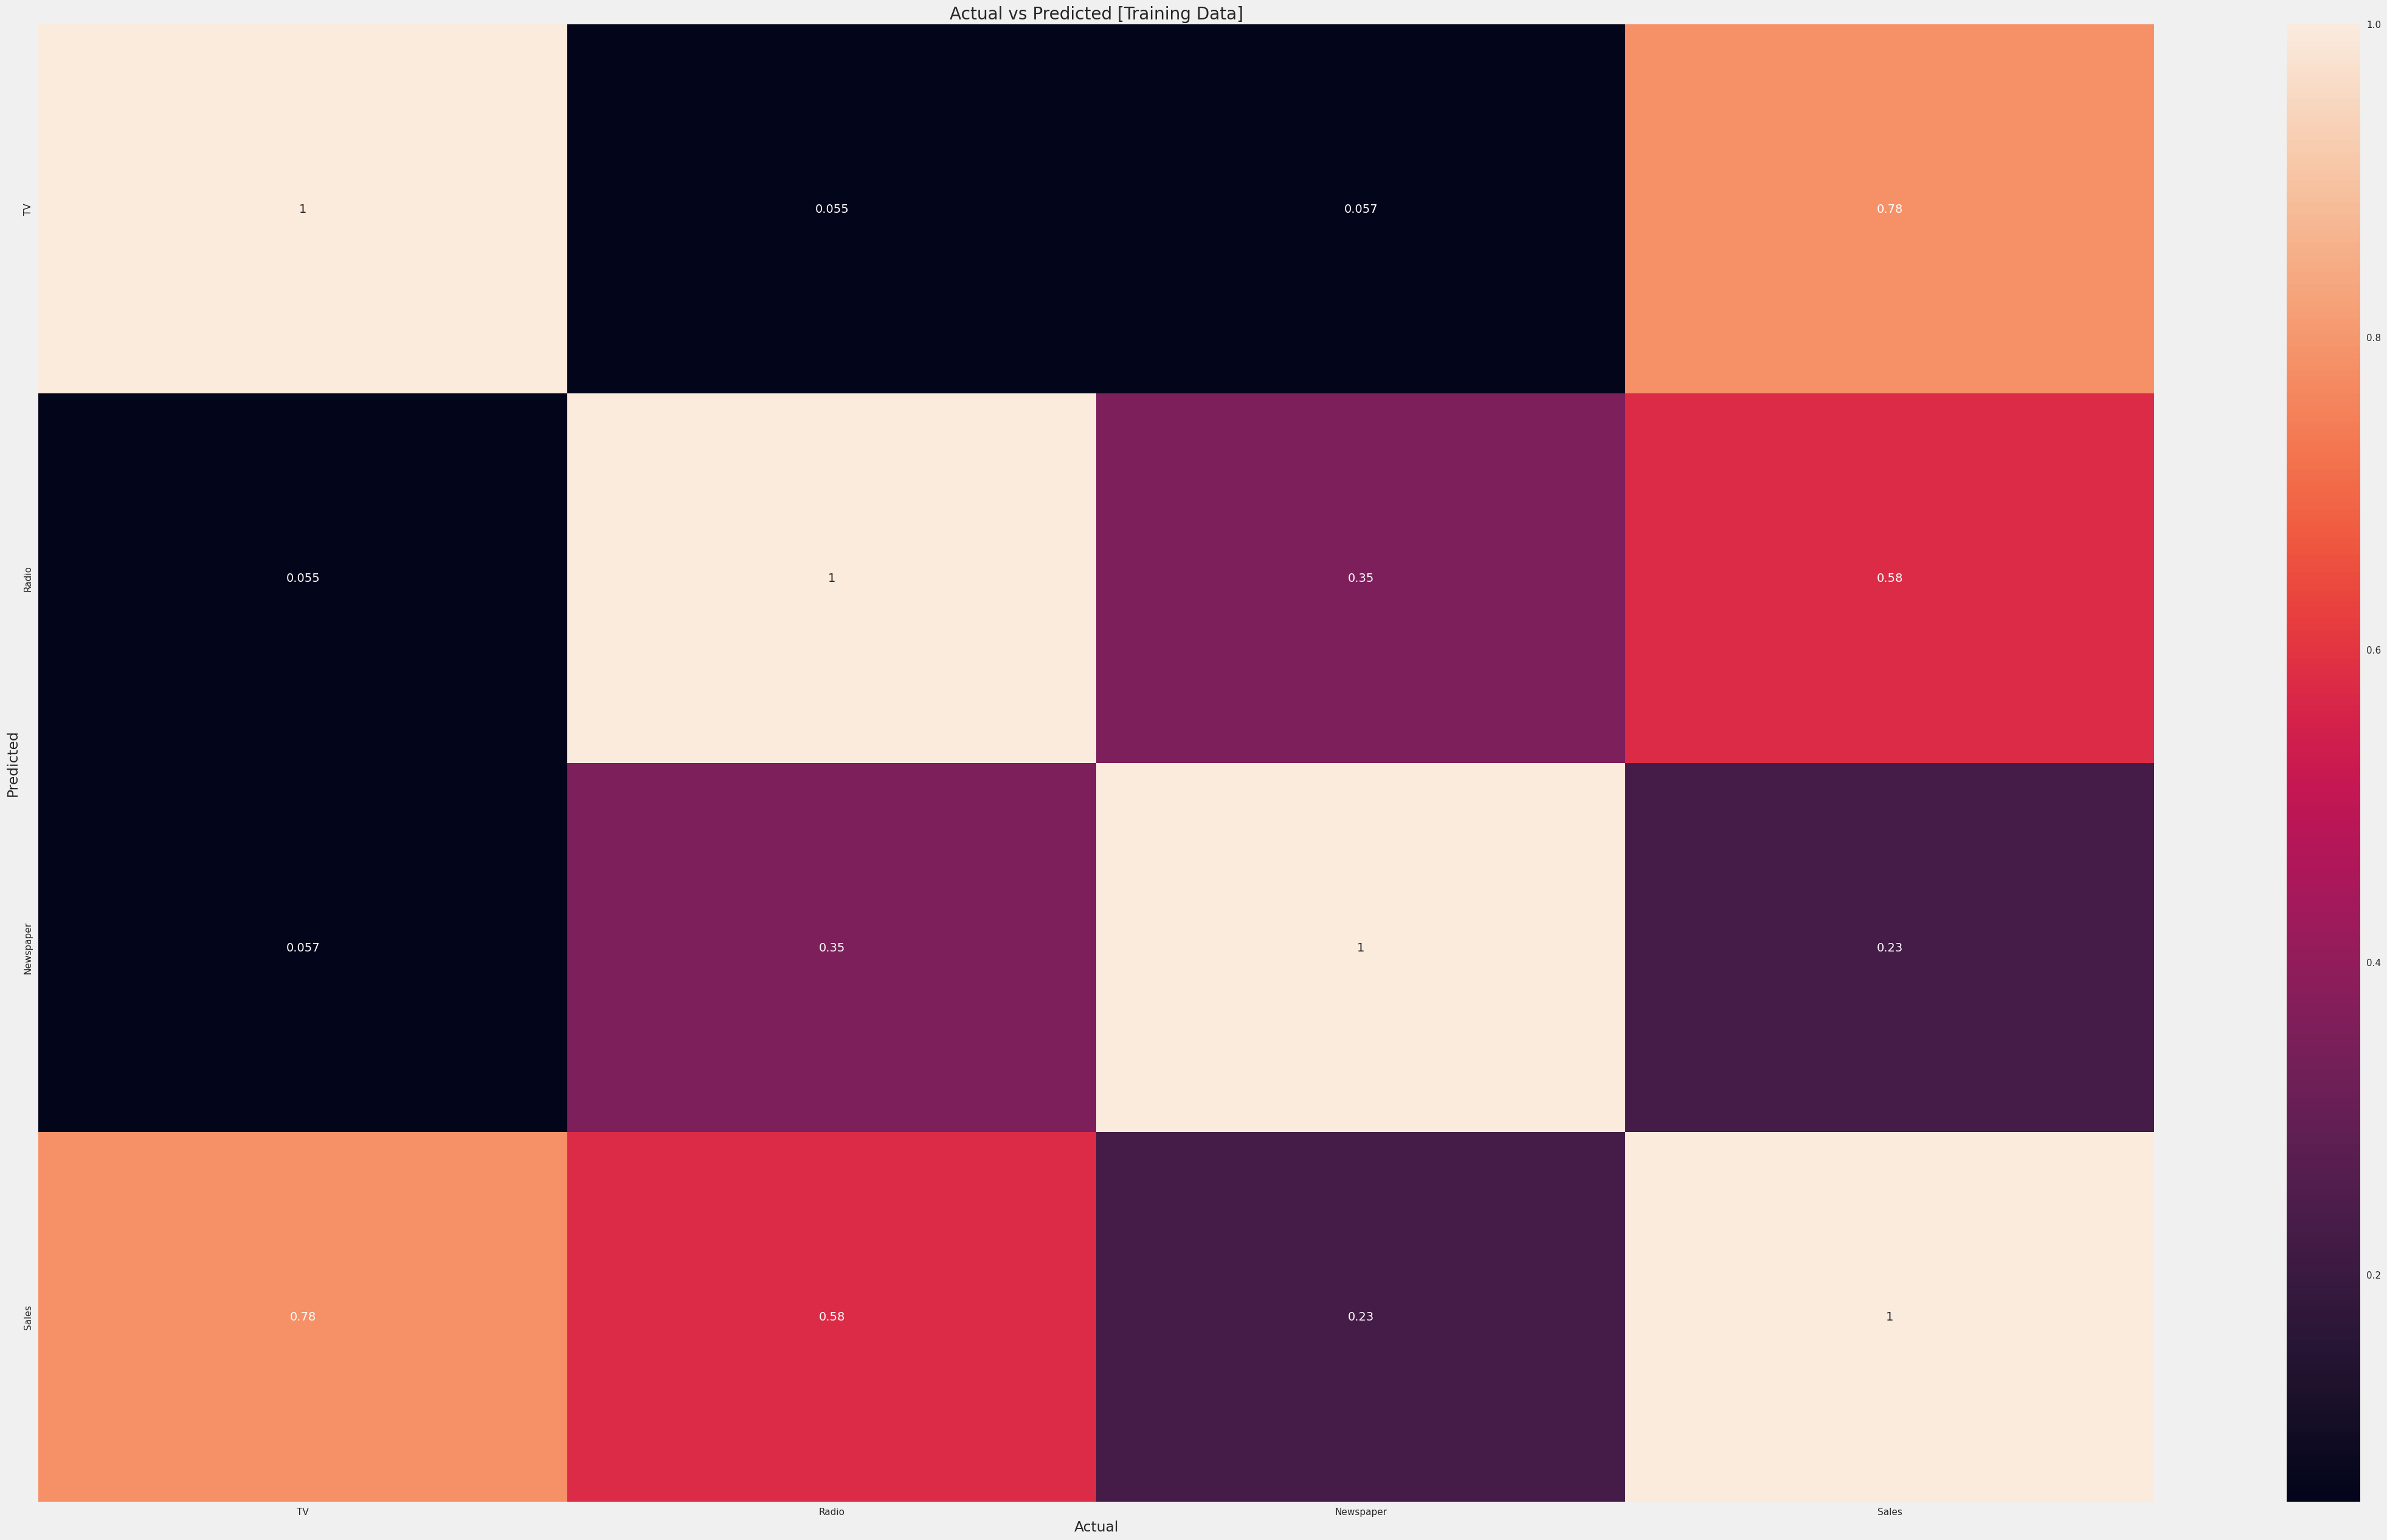

In [ ]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")
plt.show()

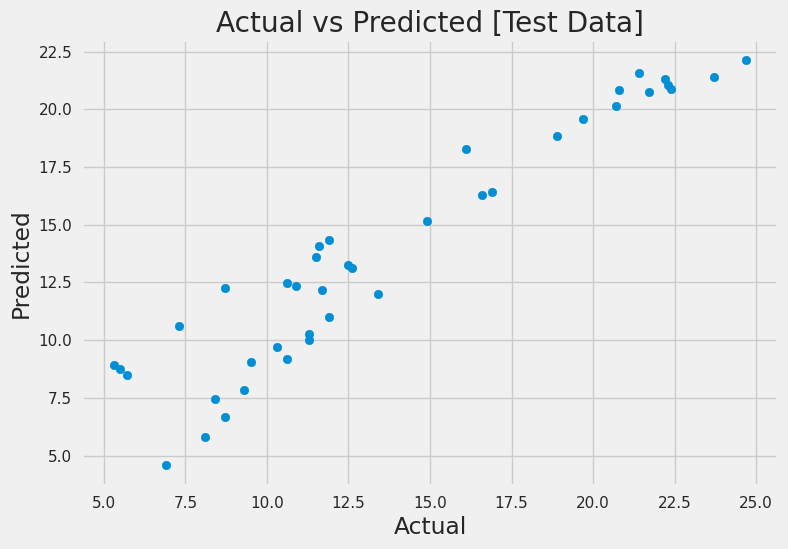

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Test Data]")
plt.show()

In [ ]:
 y_pred_test_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
y_pred_test_df.head()

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
